In [1]:
import pandas as pd

import numpy as np

In [2]:
df = pd.read_csv('hacktrain.csv', index_col=0)

In [3]:
df.describe()


,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,8000.000000,7440.000000,6800.000000,7200.000000,7040.000000,7520.000000,6880.000000,7280.000000,6640.000000,7360.000000,...,7520.000000,7280.000000,7120.000000,6240.000000,7360.000000,6880.000000,6560.000000,7440.000000,6800.000000,7600.000000
mean,4985.202625,5845.476916,4868.091395,4469.837748,5193.485086,2927.586705,4924.493648,3313.881373,4987.520158,4320.961814,...,4872.681670,3674.886731,3012.178524,3055.167358,2041.316792,2799.820342,2144.360224,6259.064275,2629.203972,2578.449870
std,2900.022898,2261.409128,2758.499942,2876.218394,2510.389832,2728.325670,2600.418802,2434.828743,2674.963286,2807.501097,...,2776.135418,2331.105635,2068.334108,2209.985887,2040.354512,2452.563243,2267.606759,1825.563702,2386.147667,2436.270797
min,1.000000,-433.735000,-1781.790000,-2939.740000,-1924.360000,-1794.870000,-1848.910000,-1574.970000,-2532.490000,-3403.050000,...,-2683.600000,-1043.160000,-2435.900000,-1505.780000,-1445.370000,55.564100,-232.292000,-2729.430000,-2139.860000,-4145.250000
25%,2515.750000,4331.232500,2067.265000,1521.195000,3087.072500,500.515750,2398.385000,992.778250,2404.075000,1377.927500,...,2010.732500,1369.355000,1368.742500,1009.827500,419.987000,791.741250,501.602750,5938.257500,691.171500,689.199000
50%,4918.500000,6908.255000,5513.375000,4672.000000,5810.755000,1586.240000,5742.485000,2802.010000,5831.120000,4497.485000,...,5484.905000,3659.770000,2633.695000,2624.125000,1183.715000,1599.385000,969.711500,6941.010000,1521.210000,1439.950000
75%,7312.250000,7626.845000,7555.570000,7431.697500,7511.880000,5703.067500,7280.110000,5508.350000,7430.915000,7217.497500,...,7607.755000,5927.035000,4128.082500,4952.317500,3075.997500,4909.997500,3227.380000,7395.612500,4452.257500,4146.342500
max,10545.000000,8376.150000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,8422.060000,...,8489.970000,7981.820000,8445.410000,7762.980000,8078.080000,8216.700000,8247.630000,8410.330000,8418.230000,8502.020000


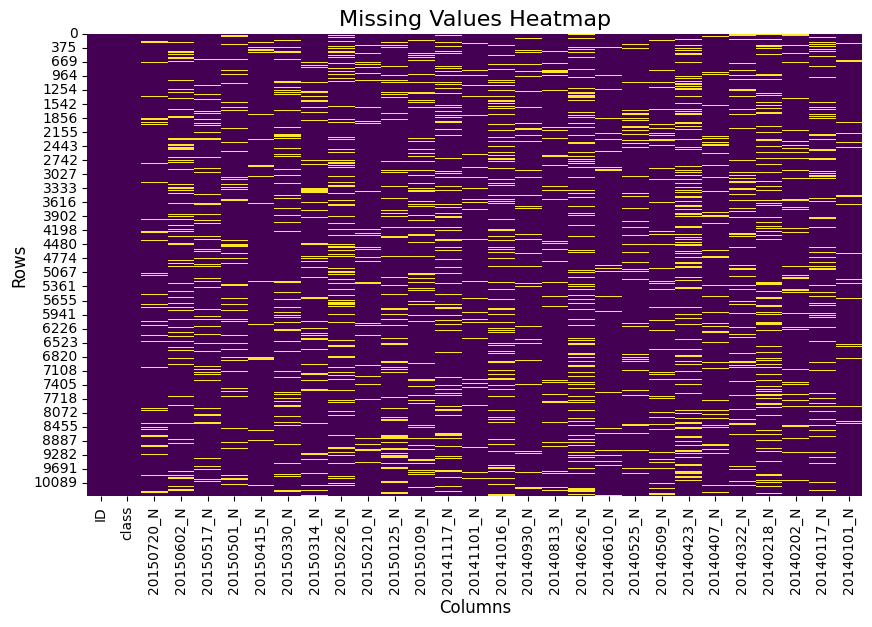

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Customize the plot
plt.title('Missing Values Heatmap', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)

# Show the plot
plt.show()

In [5]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline

# 1. Identify NDVI columns
ndvi_cols = [col for col in df.columns if col.endswith('_N')]

# 2. Extract only NDVI columns for imputation
ndvi_data = df[ndvi_cols]

# 3. Create a robust imputation pipeline
# KNNImputer will run first. Any remaining NaNs will be filled by the mean.
imputation_pipeline = Pipeline([
    ('knn_imputer', KNNImputer(n_neighbors=5)),
    ('mean_imputer', SimpleImputer(strategy='mean')) # Fallback for any remaining NaNs
])

# 4. Apply the pipeline to your NDVI data (standard, row-wise approach)
df[ndvi_cols] = imputation_pipeline.fit_transform(ndvi_data)

# 5. Verify no NaNs remain
print("Remaining NaNs after pipeline:", df[ndvi_cols].isnull().sum().sum())


Remaining NaNs after pipeline: 0


In [6]:
df.describe()


,ID,20150720_N,20150602_N,20150517_N,20150501_N,20150415_N,20150330_N,20150314_N,20150226_N,20150210_N,...,20140610_N,20140525_N,20140509_N,20140423_N,20140407_N,20140322_N,20140218_N,20140202_N,20140117_N,20140101_N
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,4985.202625,5838.948964,4843.553458,4466.070363,5189.565810,2941.078385,4918.628059,3318.299380,4981.482960,4325.189331,...,4887.081239,3672.428086,3001.544175,3037.107801,2038.375711,2780.506624,2141.952708,6247.070227,2623.414178,2584.411748
std,2900.022898,2238.806838,2707.806422,2827.072919,2460.713095,2720.515487,2530.586720,2398.465896,2587.655643,2779.594351,...,2748.994839,2290.152483,2017.237704,2102.196601,2016.723030,2387.710648,2211.267500,1823.242091,2339.893923,2423.118301
min,1.000000,-433.735000,-1781.790000,-2939.740000,-1924.360000,-1794.870000,-1848.910000,-1574.970000,-2532.490000,-3403.050000,...,-2683.600000,-1043.160000,-2435.900000,-1505.780000,-1445.370000,55.564100,-232.292000,-2729.430000,-2139.860000,-4145.250000
25%,2515.750000,4382.135000,2157.560900,1604.915000,3171.819000,506.300750,2595.491700,1036.022500,2623.817100,1425.277500,...,2084.592500,1442.177500,1431.197450,1104.490000,422.200250,820.806250,511.578650,5925.997500,701.923250,694.757750
50%,4918.500000,6867.707000,5409.850000,4659.330000,5762.845000,1634.940000,5641.185000,2832.770000,5718.585000,4502.365000,...,5483.375000,3666.770000,2657.960000,2696.832410,1203.760000,1674.255000,1020.875000,6927.069000,1596.815000,1460.890000
75%,7312.250000,7615.562500,7501.812500,7331.225000,7448.867500,5711.530000,7190.602500,5468.827500,7334.277500,7184.192500,...,7586.315000,5842.325000,4087.375000,4722.356000,3079.802500,4699.117500,3242.962000,7379.220000,4380.165000,4146.342500
max,10545.000000,8376.150000,8566.420000,8650.500000,8516.100000,8267.120000,8499.330000,8001.700000,8452.380000,8422.060000,...,8489.970000,7981.820000,8445.410000,7762.980000,8078.080000,8216.700000,8247.630000,8410.330000,8418.230000,8502.020000


In [7]:
X = df[ndvi_cols].values
y = df['class'].values 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',         
    max_iter=8000,
#     class_weight='balanced', 
    random_state=1
)
model.fit(X_train, y_train)


LogisticRegression(max_iter=8000, multi_class='multinomial', random_state=1)

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names=le.classes_))


Validation Accuracy: 0.879375
              precision    recall  f1-score   support

        farm       0.67      0.51      0.58       168
      forest       0.91      0.97      0.94      1232
       grass       0.53      0.26      0.34        39
  impervious       0.82      0.80      0.81       134
     orchard       0.25      0.17      0.20         6
       water       0.81      0.62      0.70        21

    accuracy                           0.88      1600
   macro avg       0.67      0.55      0.60      1600
weighted avg       0.87      0.88      0.87      1600



In [11]:
import pandas as pd
test_df1 = pd.read_csv('hacktest.csv', index_col=0)
ndvi_cols = [col for col in test_df1.columns if col.endswith('_N')]
print(test_df1.shape, ndvi_cols)


(2845, 28) ['20150720_N', '20150602_N', '20150517_N', '20150501_N', '20150415_N', '20150330_N', '20150314_N', '20150226_N', '20150210_N', '20150125_N', '20150109_N', '20141117_N', '20141101_N', '20141016_N', '20140930_N', '20140813_N', '20140626_N', '20140610_N', '20140525_N', '20140509_N', '20140423_N', '20140407_N', '20140322_N', '20140218_N', '20140202_N', '20140117_N', '20140101_N']


In [13]:
from sklearn.impute import KNNImputer

# 1. Identify NDVI columns (ending with '_N')
ndvi_cols = [col for col in test_df1.columns if col.endswith('_N')]

# 2. Extract only NDVI columns for imputation
ndvi_data = test_df1[ndvi_cols].copy()

# 3. Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
ndvi_imputed = imputer.fit_transform(ndvi_data)

# 4. Replace original NDVI columns with imputed values
test_df1[ndvi_cols] = ndvi_imputed

# 5. Verify no NaNs remain
print("Remaining NaNs:", test_df1[ndvi_cols].isnull().sum().sum())  # Should output 0


Remaining NaNs: 0


In [14]:
X = test_df1[ndvi_cols].values
y_pred = model.predict(X)


In [15]:
predicted_classes = le.inverse_transform(y_pred)  # le is your LabelEncoder


submission = pd.DataFrame({
    'ID': test_df1['ID'],
    'class': predicted_classes
})

submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")
print(submission.head())

Submission file created successfully!
   ID    class
0   1  orchard
1   2  orchard
2   3  orchard
3   4     farm
4   5  orchard


In [16]:
print(submission)

        ID       class
0        1     orchard
1        2     orchard
2        3     orchard
3        4        farm
4        5     orchard
...    ...         ...
2840  2841       water
2841  2842  impervious
2842  2843       water
2843  2844       water
2844  2845  impervious

[2845 rows x 2 columns]


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# --- 1. Load and Preprocess Data ---
print("Step 1: Loading and preprocessing data...")
train_df = pd.read_csv('hacktrain.csv')
test_df = pd.read_csv('hacktest.csv')
test_ids = test_df['ID']

ndvi_cols = [col for col in train_df.columns if col.endswith('_N')]

# --- 2. Enhanced Feature Engineering ---
print("Step 2: Performing enhanced feature engineering...")
def add_temporal_features(df, ndvi_cols):
    """Creates a richer set of features from the NDVI time-series."""
    # Interpolate missing values before creating features
    df[ndvi_cols] = df[ndvi_cols].interpolate(method='linear', axis=1).fillna(method='bfill').fillna(method='ffill')
    
    # Create temporal and statistical features
    df['peak_ndvi'] = df[ndvi_cols].max(axis=1)
    df['mean_ndvi'] = df[ndvi_cols].mean(axis=1)
    df['ndvi_range'] = df[ndvi_cols].max(axis=1) - df[ndvi_cols].min(axis=1)
    df['ndvi_std'] = df[ndvi_cols].std(axis=1)
    df['growing_season_length'] = (df[ndvi_cols] > 0.4).sum(axis=1)
    return df

train_df = add_temporal_features(train_df, ndvi_cols)
test_df = add_temporal_features(test_df, ndvi_cols)
feature_cols = [col for col in train_df.columns if col not in ['ID', 'class']]

# Align columns to ensure test set matches train set
test_df = test_df[feature_cols]

# --- 3. Prepare Data and Split for Validation ---
print("Step 3: Preparing data and splitting for robust evaluation...")
le = LabelEncoder()
y = le.fit_transform(train_df['class'])
X = train_df[feature_cols].values

# Split data into training and a hold-out validation set
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4. Scale Data and Train Model ---
print("Step 4: Scaling data and training the model...")
scaler = StandardScaler() # [2]
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize model with class balancing to help minority classes [4]
model = LogisticRegression(
    solver='saga',
    penalty='elasticnet',
    l1_ratio=0.1,
    C=3,
    max_iter=30000, # Increased max_iter slightly for convergence
    class_weight='balanced', # Crucial for imbalanced data
    random_state=40
)

model.fit(X_train_scaled, y_train)

# --- 5. Evaluate Model and Print Full Accuracy Chart ---
print("\nStep 5: Evaluating model performance on unseen validation data...")
y_pred_val = model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_pred_val)

print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print("\n--- Full Accuracy Chart (Classification Report) ---")
print(classification_report(y_val, y_pred_val, target_names=le.classes_))

# --- 6. Train Final Model on ALL Data for Submission ---
print("\nStep 6: Retraining final model on the entire dataset...")
# Scale the full dataset before final training
X_full_scaled = scaler.fit_transform(X)
model.fit(X_full_scaled, y)
print("Final model training complete.")

# --- 7. Create and Save the Submission File ---
print("\nStep 7: Generating submission file...")
X_submission = test_df[feature_cols].values
X_submission_scaled = scaler.transform(X_submission) # Use the same scaler

submission_preds_numeric = model.predict(X_submission_scaled)
submission_preds_labels = le.inverse_transform(submission_preds_numeric)

submission_df = pd.DataFrame({
    'ID': test_ids,
    'class': submission_preds_labels
})

submission_df.to_csv('submission_improved.csv', index=False)

print("\nSubmission file 'submission_improved.csv' has been created successfully.")
print("Submission file head:")
print(submission_df.head())


Step 1: Loading and preprocessing data...
Step 2: Performing enhanced feature engineering...
Step 3: Preparing data and splitting for robust evaluation...
Step 4: Scaling data and training the model...


/home/robo/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



Step 5: Evaluating model performance on unseen validation data...

Validation Accuracy: 0.9337

--- Full Accuracy Chart (Classification Report) ---
              precision    recall  f1-score   support

        farm       0.88      0.74      0.81       168
      forest       1.00      0.97      0.99      1232
       grass       0.62      0.74      0.67        39
  impervious       0.88      0.88      0.88       134
     orchard       0.11      0.67      0.19         6
       water       0.49      0.90      0.63        21

    accuracy                           0.93      1600
   macro avg       0.66      0.82      0.69      1600
weighted avg       0.96      0.93      0.94      1600


Step 6: Retraining final model on the entire dataset...
Final model training complete.

Step 7: Generating submission file...

Submission file 'submission_improved.csv' has been created successfully.
Submission file head:
   ID   class
0   1  forest
1   2  forest
2   3  forest
3   4  forest
4   5  forest


/home/robo/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
